<a href="https://colab.research.google.com/github/Leetora41053/sesac_practice/blob/main/9_13_pandas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tip1: 실제 csv파일은 경로를 넣어주어야한다
import pandas as pd
customer_master = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/customer_master.csv')
item_master = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/item_master.csv')
transaction_1 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_1.csv')
transaction_2 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_2.csv')
transaction_detail_1 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_detail_1.csv')
transaction_detail_2 =pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/table_data_anlaysis/shopping_mall/transaction_detail_2.csv')

In [ ]:
customer_master.head(2)

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시


In [ ]:
item_master.head(2)

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000


In [ ]:
#trasaction_1과 2의 앞뒤가 잘림
transaction_1.tail(2)

,transaction_id,price,payment_date,customer_id
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758
4999,T0000005112,50000,2019-06-15 04:42:38,HD444151


In [ ]:
transaction_2.head(2)

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892


In [ ]:
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


# 데이터결합

In [ ]:
#concat을 이용해 1과 2를 연결
#concat을 하면 index가 겹치기 때문에 문제가 발생할 가능성이 있음
transaction = pd.concat([transaction_1,transaction_2], ignore_index = True) #index가 중복되니 없애준다
transaction_detail =  pd.concat([transaction_detail_1,transaction_detail_2], ignore_index = True)

In [ ]:
merge1 = pd.merge(
    left = transaction_detail, right = transaction.drop('price', axis = 1),#price를 drop해 오차를 없앤다
    on = 'transaction_id', how = 'left')
merge1.head()

#발생할 수 있는 문제: quantity와 price가 겹쳐 quantity와 price 데이터를 분리된 데이터로 인식


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


### 실습:
위에서 생성한 merge1 데이터프레임과 customer_master, item_master를 merge하기

In [ ]:
merge1.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [ ]:
customer_master.head(2)

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시


In [ ]:
item_master.head(2)

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000


In [ ]:
 merge2 = pd.merge(
    left = merge1, right = customer_master,
    on = 'customer_id', how = 'left')
merge2.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시


In [ ]:
merge3 = pd.merge(
    left = merge2, right = item_master,
    on = 'item_id', how = 'left')
merge3.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [ ]:
#null 값이 발생할 수 있으니 -> merge3.isnull()
merge3.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
dtype: int64

In [ ]:
#price를 없앴으니 새로 만들어준다
merge3['price'] = merge3['quantity'] * merge3['item_price']

#price가 잘 만들어졌을까?
print(merge3['price'].sum())
print(transaction['price'].sum())

971135000
971135000


In [ ]:
# to_datetime()함수를 통해 데이터 형식으로 변환
merge3['birth'] = pd.to_datetime(merge3['birth'])
merge3['payment_date'] = pd.to_datetime(merge3['payment_date'])
merge3['registration_date	'] = pd.to_datetime(merge3['registration_date'])
merge3.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000


### 퀴즈!
1. 성별에 따른 매출 총합을 비교하고 어떤 성별이 매출이 더 높은지 구해보세요.
2. 태어난 년도(birth) 별 매출을 구해보세요.
3. payment_date칼럼을 활용하여 구매년월(payment_month) 칼럼을 생성하고 구매년월, 아이템 이름에 따른 매출 총합과 수량 총합을 구해보세요.

In [ ]:
# 1. 성별에 따른 매출 총합을 비교하고 어떤 성별이 매출이 더 높은지 구해보세요.

merge3[['gender','price']].groupby('gender').sum()

#pivot table 방식

pd.pivot_table(data = merge3, index = 'gender', values = 'price', aggfunc = 'sum')


,price
gender,
F,481045000
M,490090000


In [ ]:
#2. 태어난 년도(birth) 별 매출을 구해보세요.

merge3['birth_year'] = merge3['birth'].dt.year
merge3[['birth_year','price']].groupby('birth_year').sum()

,price
birth_year,
1938,4405000
1939,15300000
1940,10225000
1941,12270000
1942,14515000
...,...
1995,13750000
1996,16085000
1997,11935000


In [ ]:
#3. payment_date칼럼을 활용하여 구매년월(payment_month) 칼럼을 생성하고 구매년월, 아이템 이름에 따른 매출 총합과 수량 총합을 구해보세요.

merge3['payment_month'] = merge3['payment_date'].dt.strftime('%Y%m')

In [ ]:
subset1  = merge3[['payment_month', 'item_name' , 'price' , 'quantity']]
subset1.groupby(['payment_month','item_name']).sum() #groupby의 첫번째, 두번째로 나누어 나열할 수 있도록

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

#matplotlib

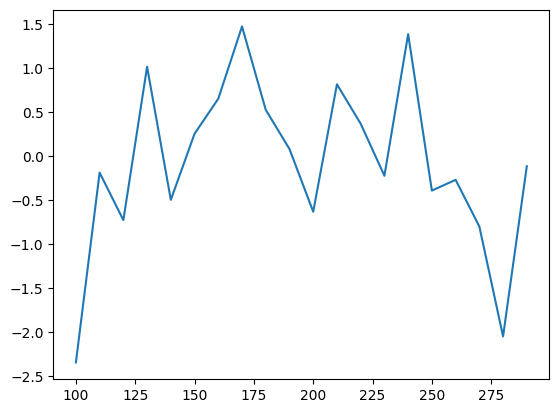

In [89]:
# !pip install matplotlib

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100, 300, 10)
y = np.random.randn(20)

plt.plot(x,y)

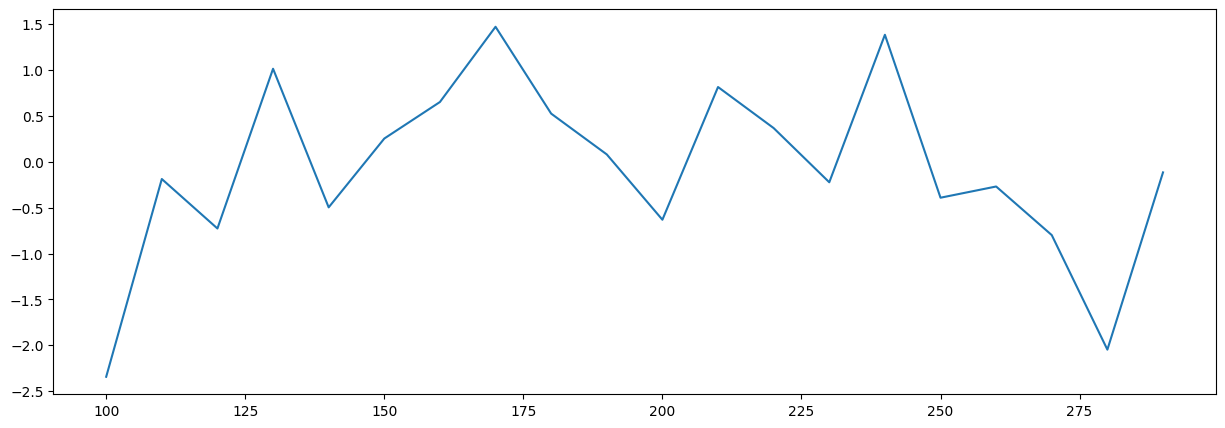

In [91]:
#figure 사이즈를 변경해야 x와 y축의 사이즈가 늘어남

plt.figure(figsize= (15,5))
plt.plot(x,y)

Text(0.5, 1.0, 'Title')

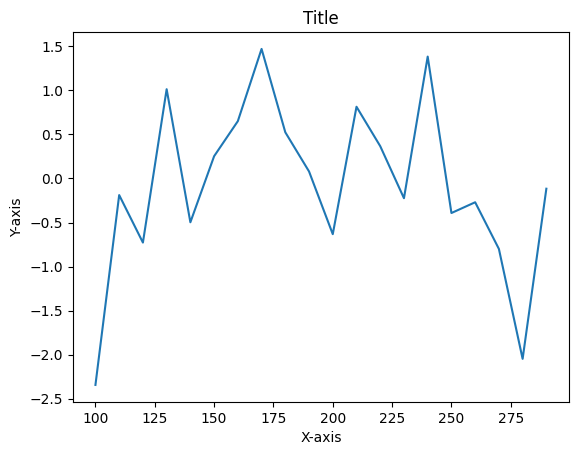

In [92]:
#그래프에 라벨 붙여주기
plt.plot(x,y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Title')

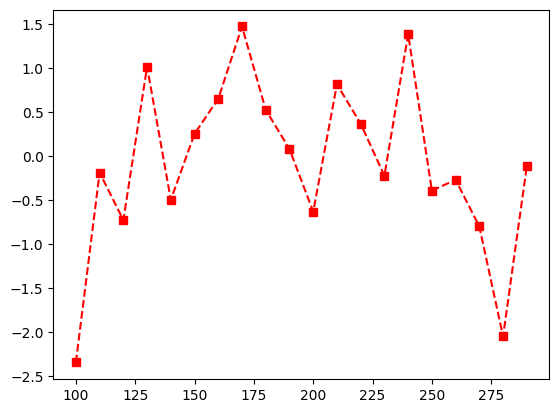

In [93]:
#테이블 시각화 추가 기능
plt.plot(x,y, color = 'r', linestyle = '--', marker = 's') #컬러 / 라인 / 마커

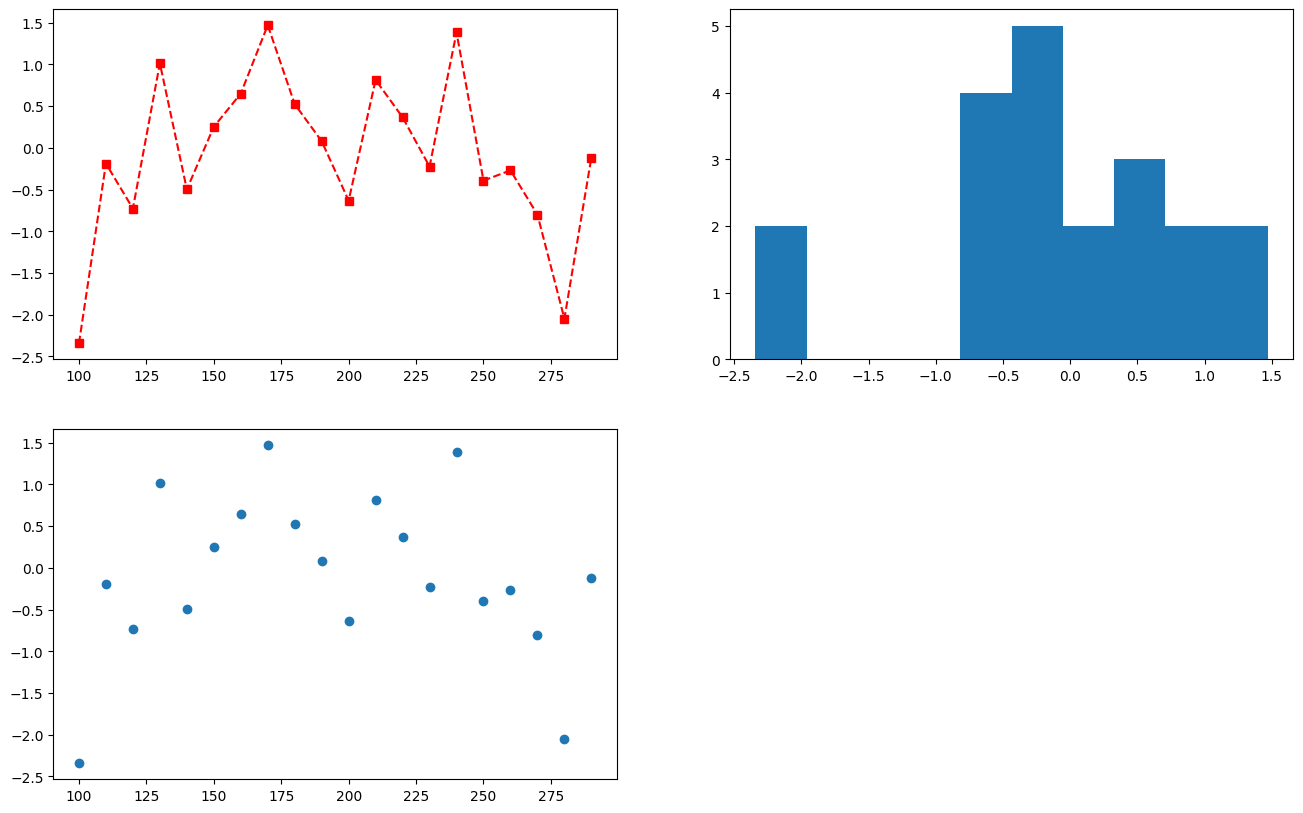

In [100]:
#그래프를 여러개 만들고 싶다면?
# figure를 따로 따로 생성해야 한다
fig = plt.figure(figsize = (16,10))

#axes 하나를 만들기
axes1 = fig.add_subplot(2,2,1)#2x2 사이즈 만들어서 첫번째

#axes1을 plt 대신 집어넣는다. 1사분면에 존재하긴 함
axes1.plot(x,y, color = 'r', linestyle = '--', marker = 's')

axes2 = fig.add_subplot(2,2,2)#2x2 사이즈 만들어서 두번째
#axes2를 히스토그램으로 변경
axes2.hist(y)

axes3 = fig.add_subplot(2,2,3)#2x2 사이즈 만들어서 두번째
axes3.scatter(x,y)

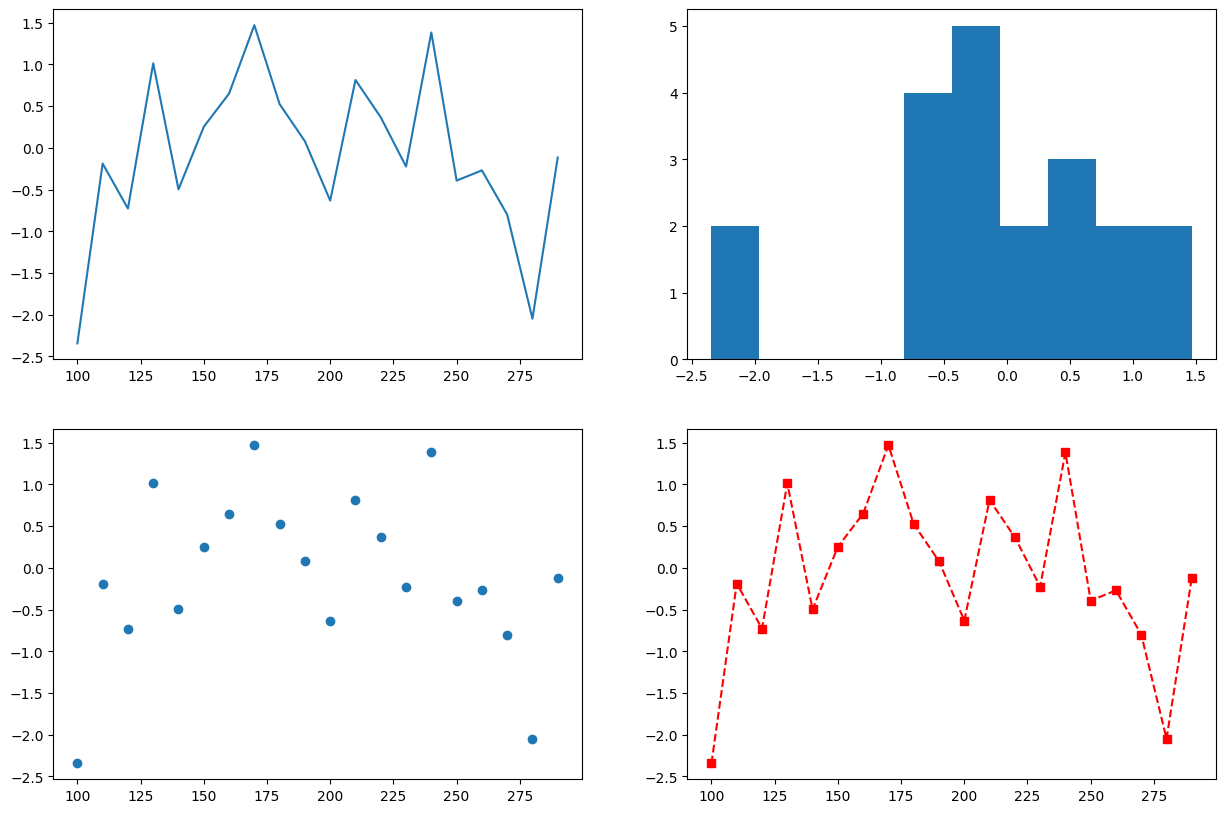

In [108]:
#방법2 fig와 axes를 나눠서 그래프 만드는 법
fig, axes = plt.subplots(2,2 , figsize = (15,10))

#axes 첫번째 접근
axes[0,0].plot(x, y)

#axes 두번째 접근
axes[0,1].hist(y)

#axes 세번째 접근
axes[1,0].scatter(x,y)

#axes 네번째 접근
#그래프 디자인을 간결하기
axes[1,1].plot(x,y,'r--s')

## 하나의 figure 안에 두 개의 그래프 그리기

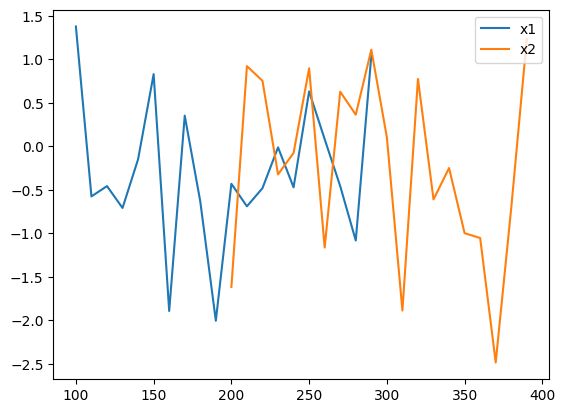

In [109]:
x1 = np.arange(100,300,10)
y1 = np.random.randn(20)

x2 = np.arange(200,400,10)
y2 = np.random.randn(20)

plt.plot(x1,y1, label = 'x1')
plt.plot(x2,y2, label = 'x2')

#범례(label)의 위치
#legend를 표시하는 함수
plt.legend(loc = 1)

# 여러 그래프의 label,title 다루기

Text(0.5, 0.98, 'Figure Title')

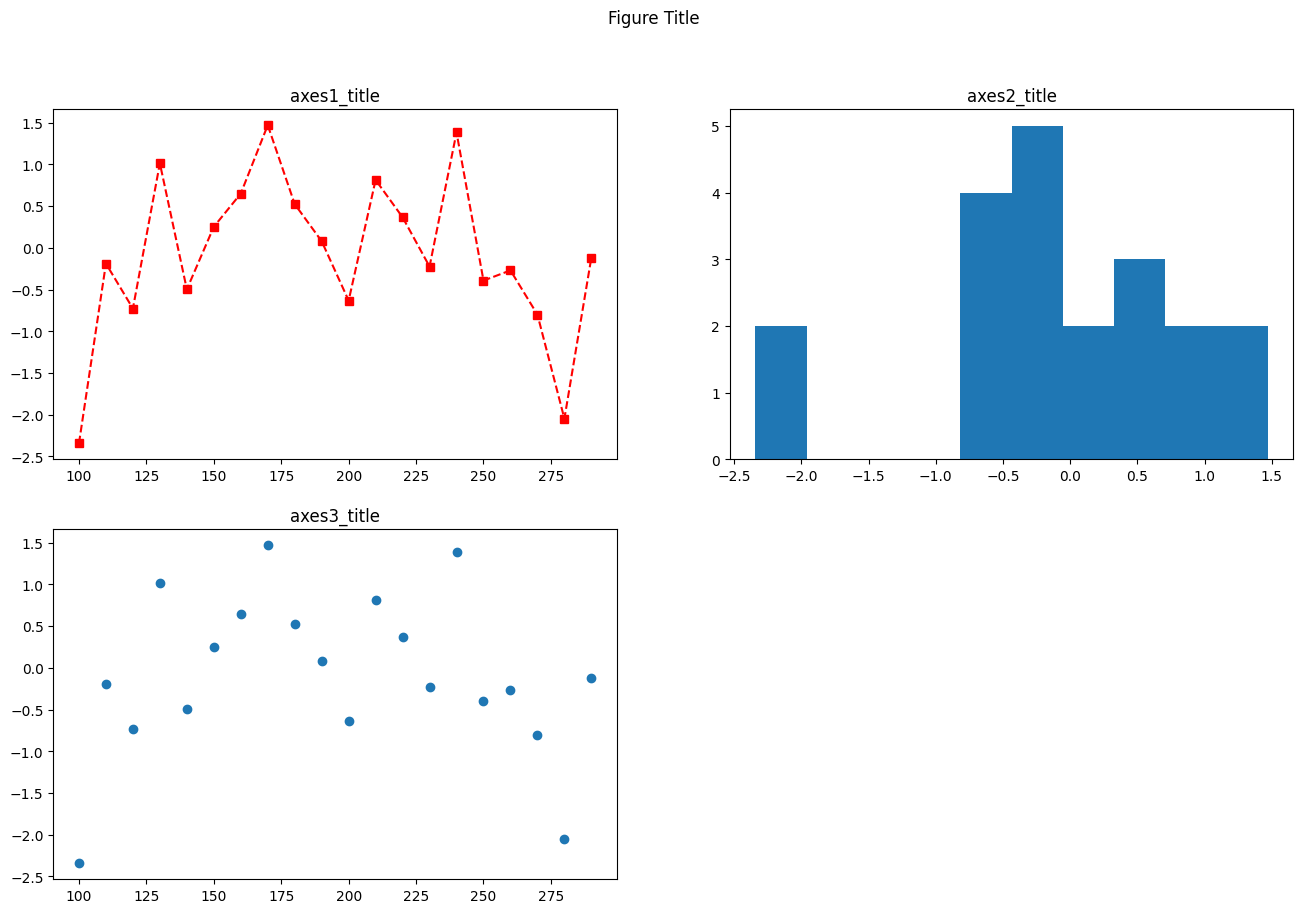

In [111]:
#그래프를 여러개 만들고 싶다면?
# figure를 따로 따로 생성해야 한다
fig = plt.figure(figsize = (16,10))

#axes 하나를 만들기
axes1 = fig.add_subplot(2,2,1)#2x2 사이즈 만들어서 첫번째

#axes1을 plt 대신 집어넣는다. 1사분면에 존재하긴 함
axes1.plot(x,y, color = 'r', linestyle = '--', marker = 's')
axes1.set_title('axes1_title')
axes2 = fig.add_subplot(2,2,2)#2x2 사이즈 만들어서 두번째

#axes2를 히스토그램으로 변경
axes2.hist(y)
axes2.set_title('axes2_title')

axes3 = fig.add_subplot(2,2,3)#2x2 사이즈 만들어서 세번째
axes3.scatter(x,y)
axes3.set_title('axes3_title')

#figure 타이틀 - 그래프 총합의 제목 설정하기
fig.suptitle('Figure Title')

20230913_과제
1. 자동차 제조사에 따른 자동차 종류의 개수
2. 자동차 배기량과 고속도로 연비 시각화
3. 자동차 구동방식 별 도시연비 비교 시각화




In [25]:
import pandas as pd
mpg = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/mpg.csv')

In [27]:
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [28]:
mpg.tail()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [ ]:
#1 자동차 제조사에 따른 자동차 종류의 개수
mpg = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/mpg.csv')
mpg[['manufacturer','model']].groupby('manufacturer').count()


Text(0.5, 1.0, 'displ-hwy relationship')

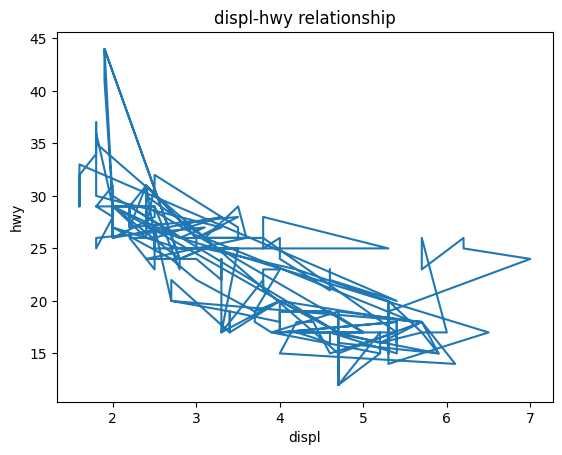

In [35]:
#2. 자동차 배기량과 고속도로 연비 시각화
import matplotlib.pyplot as plt
import numpy as np

x = mpg['displ'].values
y = mpg['hwy'].values

plt.plot(x,y)
plt.xlabel('displ')
plt.ylabel('hwy')
plt.title('displ-hwy relationship')

In [34]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [33]:
#3. 자동차 구동방식 별 도시연비 비교 시각화
#drv(구동방식): 전륜f 후륜r 사륜4
mpg[['drv','cty']].groupby('drv').mean()

#x축: f/r/4 로만 이름 설정
#y축: city의 f/r/4별 평균
x1 = ['f','r','4']
y1 = mpg[['drv','cty']].groupby('drv').mean()

plt.plot(x1,y1)
plt.legend(loc = 1)
#범례(label)의 위치
#legend를 표시하는 함수


IndexError: ignored